# image size

In [15]:
from PIL import Image

def get_image_size(file_path):
    try:
        with Image.open(file_path) as img:
            width, height = img.size
            return width, height
    except Exception as e:
        print(f"Error: {e}")
        return None

# Replace 'your_image.png' with the path to your PNG image file
image_path = 'data/fundus/MuReD/images/images/1000.png'

size = get_image_size(image_path)

if size:
    print(f"The size of the image '{image_path}' is {size[0]} pixels wide and {size[1]} pixels high.")


The size of the image 'data/fundus/MuReD/images/images/1000.png' is 1387 pixels wide and 1389 pixels high.


# class numbers

In [3]:
# train data
import pandas as pd

# 載入標籤文件
labels_df = pd.read_csv('data/fundus/MuReD/train_data.csv')

# 統計每個欄位（即每個標籤類別）中值為1的數量
counts = labels_df.sum(axis=0)  # axis=0 表示沿著列方向進行加總

counts.to_dict()

{'ID': 'aria_c_25_1aria_c_7_2aria_c_38_2aria_c_2_8aria_c_26_15aria_c_20_18aria_c_27_3aria_c_47_2aria_c_31_20aria_c_31_2aria_c_39_a_10aria_c_32_2aria_c_32_21aria_c_5_4aria_c_26_2(0031)aria_c_37aria_c_35_27aria_c_9_6aria_c_2_3aria_c_35_26aria_c_6_5aria_c_24_2aria_c_40_a_6aria_c_1_7aria_c_22_1aria_c_46_12aria_c_9_1aria_c_36_44aria_c_20_10aria_c_21_3aria_c_35_2aria_c_5_1aria_c_21_12aria_c_30_2aria_c_38_42aria_c_1_8aria_c_22_9aria_c_6_2aria_c_41_15aria_c_4_1aria_c_4_8aria_c_24_12aria_c_44_12aria_c_20_1aria_c_34_1aria_c_45_2aria_c_45_12aria_c_23_4aria_c_44_3aria_d_13_22aria_d_3_2aria_d_18_21aria_d_16_22aria_d_8_2aria_d_24_6aria_d_15_22aria_d_22_22aria_d_2_6aria_d_5_22aria_d_21_21aria_d_7_22aria_d_8_23aria_d_4_31aria_d_7_17aria_d_18_2aria_d_12_2aria_d_3_32aria_d_20_17(0001)aria_d_27aria_d_22_2aria_d_15_2(0026)aria_d_27aria_d_25_2aria_d_5_2aria_d_3_33aria_d_20_2aria_d_17_12aria_d_12_20(0024)aria_d_30aria_d_4_5(0003)aria_d_29aria_d_9_24aria_d_16_2aria_d_2_31aria_d_17_2(0001)aria_d_26aria_d_13_2

In [17]:
# test_data
import pandas as pd

# 載入標籤文件
labels_df = pd.read_csv('data/fundus/MuReD/lpros045_train_data.csv')

# 統計每個欄位（即每個標籤類別）中值為1的數量
counts = labels_df.sum(axis=0)  # axis=0 表示沿著列方向進行加總

counts.to_dict()

{'ID': 'aria_c_25_1aria_c_7_2aria_c_38_2aria_c_2_8aria_c_26_15aria_c_20_18aria_c_27_3aria_c_47_2aria_c_31_20aria_c_31_2aria_c_39_a_10aria_c_32_2aria_c_32_21aria_c_5_4aria_c_26_2(0031)aria_c_37aria_c_35_27aria_c_9_6aria_c_2_3aria_c_35_26aria_c_6_5aria_c_24_2aria_c_40_a_6aria_c_1_7aria_c_22_1aria_c_46_12aria_c_9_1aria_c_36_44aria_c_20_10aria_c_21_3aria_c_35_2aria_c_5_1aria_c_21_12aria_c_30_2aria_c_38_42aria_c_1_8aria_c_22_9aria_c_6_2aria_c_41_15aria_c_4_1aria_c_4_8aria_c_24_12aria_c_44_12aria_c_20_1aria_c_34_1aria_c_45_2aria_c_45_12aria_c_23_4aria_c_44_3aria_d_13_22aria_d_3_2aria_d_18_21aria_d_16_22aria_d_8_2aria_d_24_6aria_d_15_22aria_d_22_22aria_d_2_6aria_d_5_22aria_d_21_21aria_d_7_22aria_d_8_23aria_d_4_31aria_d_7_17aria_d_18_2aria_d_12_2aria_d_3_32aria_d_20_17(0001)aria_d_27aria_d_22_2aria_d_15_2(0026)aria_d_27aria_d_25_2aria_d_5_2aria_d_3_33aria_d_20_2aria_d_17_12aria_d_12_20(0024)aria_d_30aria_d_4_5(0003)aria_d_29aria_d_9_24aria_d_16_2aria_d_2_31aria_d_17_2(0001)aria_d_26aria_d_13_2

# Adjust image

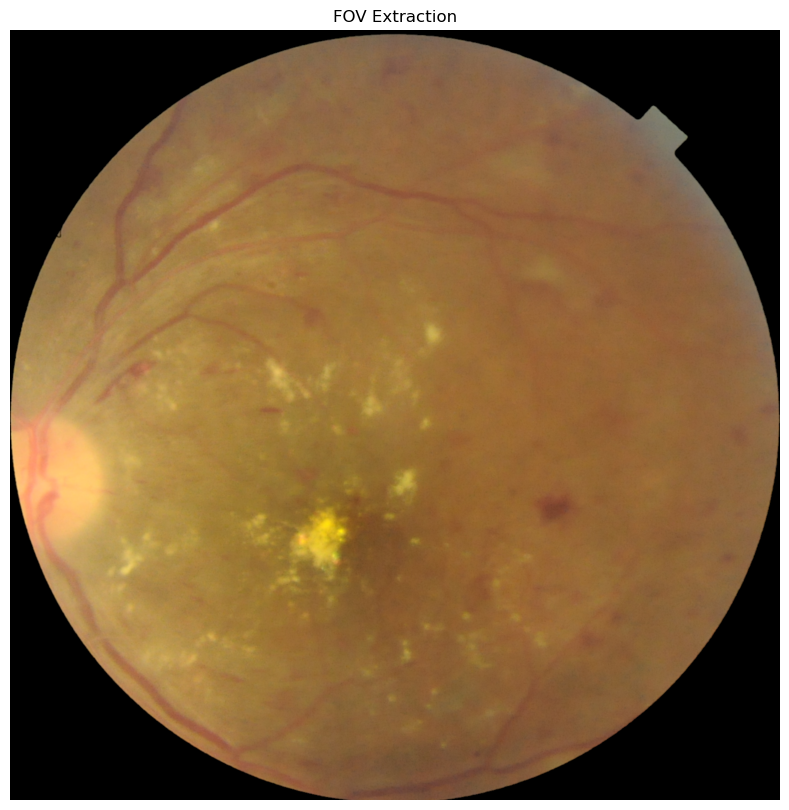

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image = cv2.imread('data/fundus/MuReD/images/images/1.png')

# 转换为灰度图
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 应用阈值来区分前景和背景
_, thresh = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY)

# 找到轮廓
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 假设最大的轮廓是眼底区域
c = max(contours, key=cv2.contourArea)

# 创建一个和原始图像大小相同的掩模，初始全为0
mask = np.zeros_like(gray)

# 填充找到的轮廓，创建掩模
cv2.drawContours(mask, [c], -1, 255, thickness=cv2.FILLED)

# 应用掩模
result = cv2.bitwise_and(image, image, mask=mask)

# 使用matplotlib显示结果
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('FOV Extraction')
plt.axis('off')  # 不显示坐标轴
plt.show()
